In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define system in terms of separated differential equations
alpha = 5000
beta1 = 0.5
beta2 = 0.5
gamma = 0.001

def f(x,y):
    return alpha - beta1 * x - (1 - beta1) * ( 1 - (1 - gamma) ** y ) * x
def g(x,y):
    return - beta2 * y + (1 - beta1) * ( 1 - (1 - gamma) ** y ) * x

In [3]:
from scipy import integrate

# define system in terms of a Numpy array
def Sys(x, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ alpha - beta1 * x[0] - (1 - beta1) * ( 1 - (1 - gamma)**x[1] ) * x[0], - beta2 * x[1] + (1 - beta1) * ( 1 - (1 - gamma) ** x[1] ) * x[0] ])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([10000, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

In [4]:
# nullclines
def NtoM(N):
    return np.log((N - alpha) / (N * (1 - beta1))) / np.log(1 - gamma)

def MtoN(M):
    return  beta2*M / ((1 - (1 - gamma)**M )* (1 - beta1))

N = np.linspace(-1000, 12000, num=10000)
M = np.linspace(-1000, 12000, num=10000)

In [5]:
n = np.linspace(-1000, 12000, num=100)
m = np.linspace(-1000, 12000, num=100)

N1 , M1  = np.meshgrid(n, m)                    # create a grid
DN1, DM1 = Sys([N1, M1])                        # compute growth rate on the grid
K = (np.hypot(DN1, DM1))                        # norm growth rate 
K[ K == 0] = 1.                                 # avoid zero division errors 
DN1 /= K                                        # normalize each arrows
DM1 /= K

/Users/yingqiuzheng/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


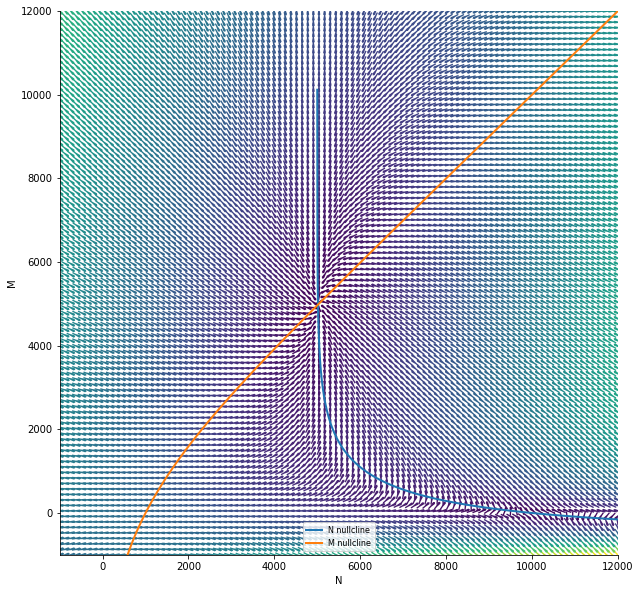

In [6]:
fig = plt.figure(figsize = (10, 10))
axe = fig.add_subplot(1, 1, 1)
#axe.plot(x, y, linewidth = 2, label = 'trajectory')
axe.plot(N, NtoM(N), linewidth=2, label = 'N nullcline')
axe.plot(MtoN(M), M, linewidth=2, label = 'M nullcline')
axe.plot()
axe.quiver(N1, M1, DN1, DM1, K, pivot='mid',headwidth=2, headlength=1, scale=60)
axe.spines['right'].set_visible(False)
axe.spines['top'].set_visible(False)
#axe.yaxis.set_tick_params(left=None, labelleft=False) 
#axe.xaxis.set_tick_params(bottom=None, labelbottom=False)
#axe.plot(5017.15238413,4982.84761587, marker = '.', markersize = 15, color = 'k')
#axe.plot(10000, 0, marker = '.', markersize = 15, color = 'k')
plt.xlim([-1000, 12000])
plt.ylim([-1000, 12000])
axe.legend(fontsize = 8)
plt.ylabel('M')
plt.xlabel('N')
#axe.grid()
plt.show()